<a href="https://colab.research.google.com/github/chernandez87-ux/EstadisticaPY/blob/main/Proyecto_estadistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

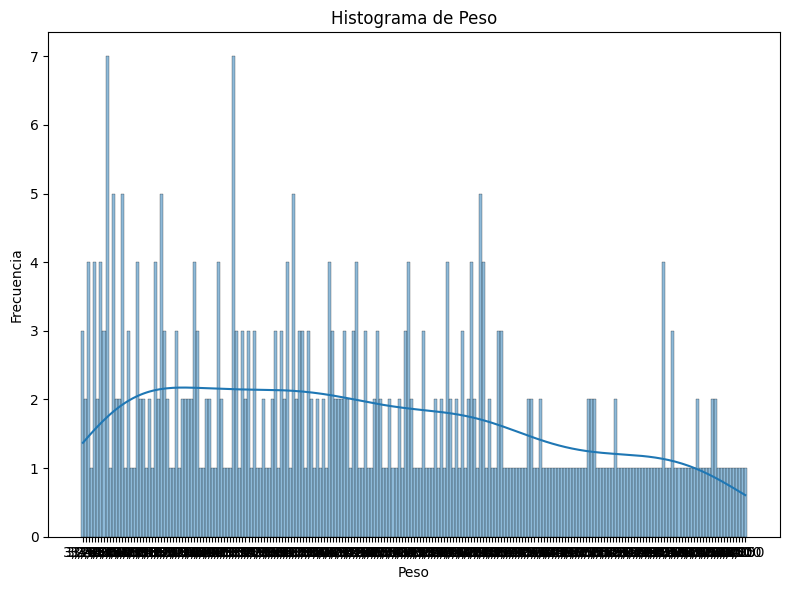

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma para Peso
plt.figure(figsize=(8, 6))
sns.histplot(df_filtrado['Peso'], bins=10, edgecolor='black', kde=True)
plt.xlabel('Peso')
plt.ylabel('Frecuencia')
plt.title('Histograma de Peso')
plt.tight_layout()
plt.show()

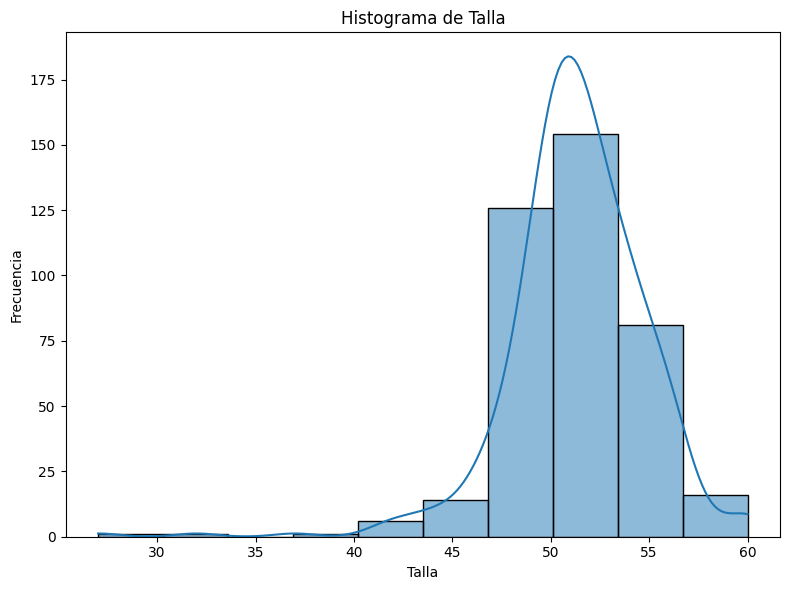

In [ ]:
# Histograma para Talla
plt.figure(figsize=(8, 6))
sns.histplot(df_filtrado['Talla'], bins=10, edgecolor='black', kde=True)
plt.xlabel('Talla')
plt.ylabel('Frecuencia')
plt.title('Histograma de Talla')
plt.tight_layout()
plt.show()

In [ ]:
# Eliminar filas con datos faltantes
df_filtrado = df.dropna()

# Mostrar el número de filas después de la limpieza
print(f"\nNúmero de filas después de eliminar datos faltantes: {df_filtrado.shape[0]}")

# Identificar y mostrar el número de datos faltantes por columna
faltantes = df_filtrado.isnull().sum()
print("\nDatos faltantes por columna después de la limpieza:")
print(faltantes)


Número de filas después de eliminar datos faltantes: 400

Datos faltantes por columna después de la limpieza:
Departamento Nacimiento     0
Municipio Nacimiento        0
Area Nacimiento             0
Cód. IPS                    0
IPS                         0
Sexo                        0
Peso                        0
Talla                       0
Fecha Nacimiento            0
Hora Nacimiento             0
Parto Atendido Por          0
Tiempo Gestación            0
Tipo Parto                  0
Grupo Sanguineo             0
Factor RH                   0
Departamento Residencia     0
Municipio Residencia        0
Área Residencia             0
Régimen Seguridad Social    0
EPS                         0
dtype: int64


/tmp/ipython-input-100982550.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


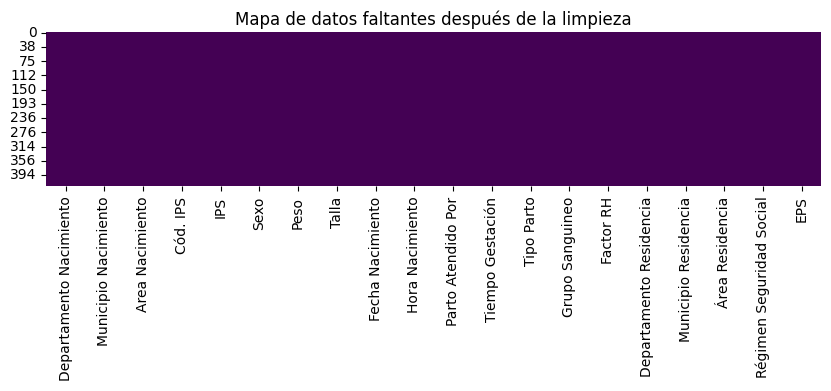

In [ ]:
# Visualizar el mapa de calor de datos faltantes (debería estar vacío si la limpieza fue exitosa)
plt.figure(figsize=(10, 2))
sns.heatmap(df_filtrado.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de datos faltantes después de la limpieza")
plt.tight_layout()
# plt.savefig("mapa_datos_faltantes.png") # Quitar comentario si se quiere guardar la figura
plt.show()

In [ ]:
# Valores faltantes
print("\nValores faltantes por columna:")
print(df.isnull().sum())


Valores faltantes por columna:
Departamento Nacimiento      0
Municipio Nacimiento         0
Area Nacimiento              0
Cód. IPS                     0
IPS                          0
Sexo                         0
Peso                         0
Talla                        0
Fecha Nacimiento             0
Hora Nacimiento              0
Parto Atendido Por           0
Tiempo Gestación             0
Tipo Parto                   0
Grupo Sanguineo              3
Factor RH                    3
Departamento Residencia      0
Municipio Residencia         0
Área Residencia              0
Régimen Seguridad Social     0
EPS                         23
dtype: int64


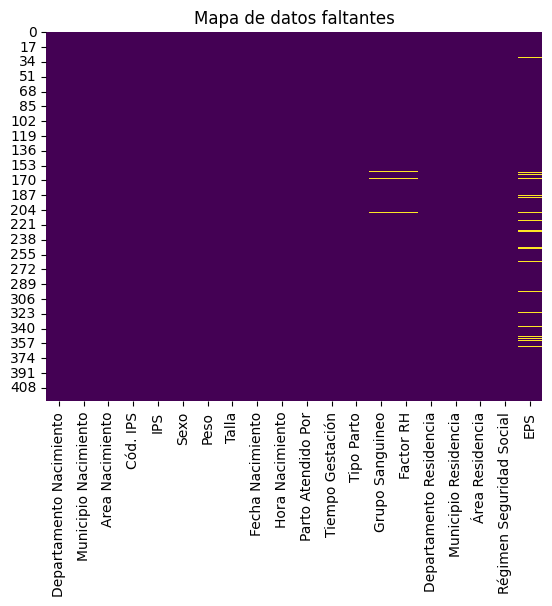

In [ ]:
# Visualización de nulos
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de datos faltantes")
plt.show()

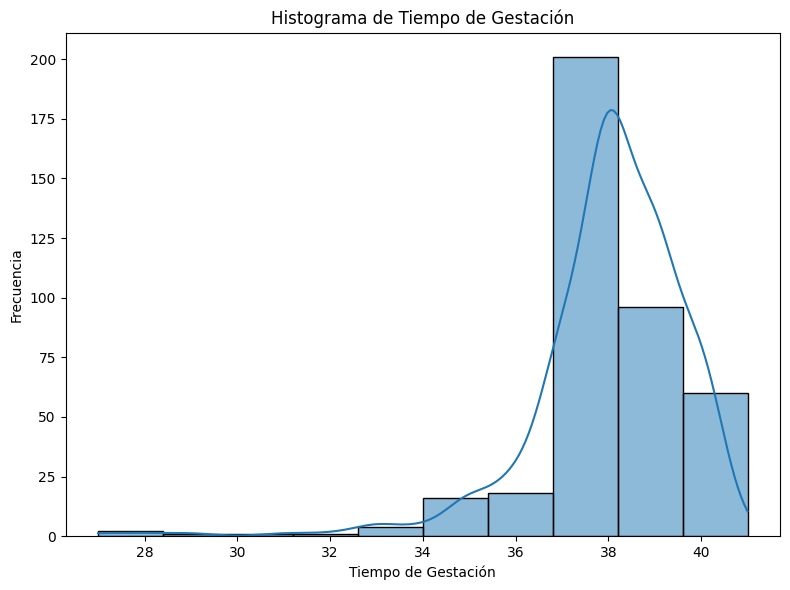

In [ ]:
# Histograma para Tiempo de Gestación
plt.figure(figsize=(8, 6))
sns.histplot(df_filtrado['Tiempo Gestación'], bins=10, edgecolor='black', kde=True)
plt.xlabel('Tiempo de Gestación')
plt.ylabel('Frecuencia')
plt.title('Histograma de Tiempo de Gestación')
plt.tight_layout()
plt.show()

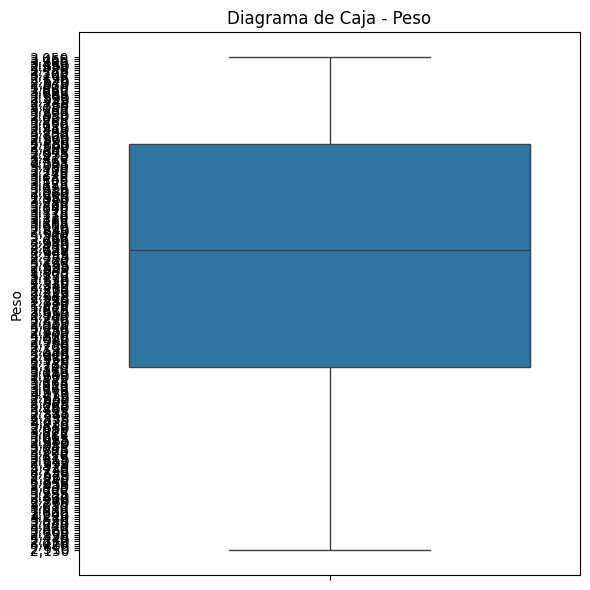

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Diagrama de caja para Peso
plt.figure(figsize=(6, 6))
sns.boxplot(y=df_filtrado['Peso'])
plt.title('Diagrama de Caja - Peso')
plt.tight_layout()
plt.show()

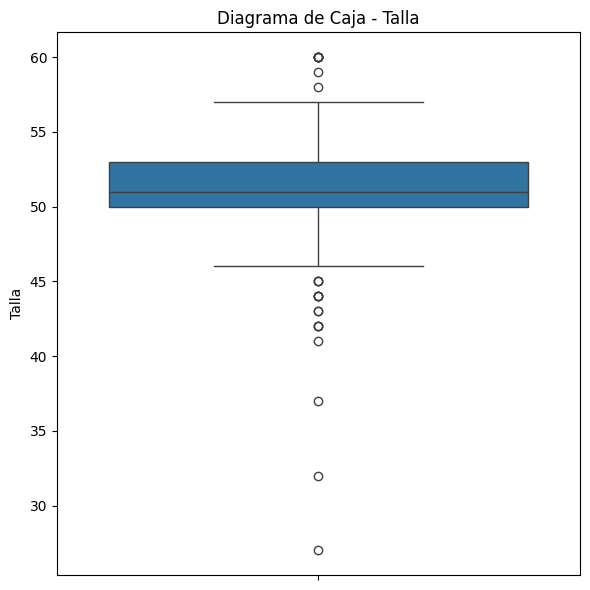

In [ ]:
# Diagrama de caja para Talla
plt.figure(figsize=(6, 6))
sns.boxplot(y=df_filtrado['Talla'])
plt.title('Diagrama de Caja - Talla')
plt.tight_layout()
plt.show()

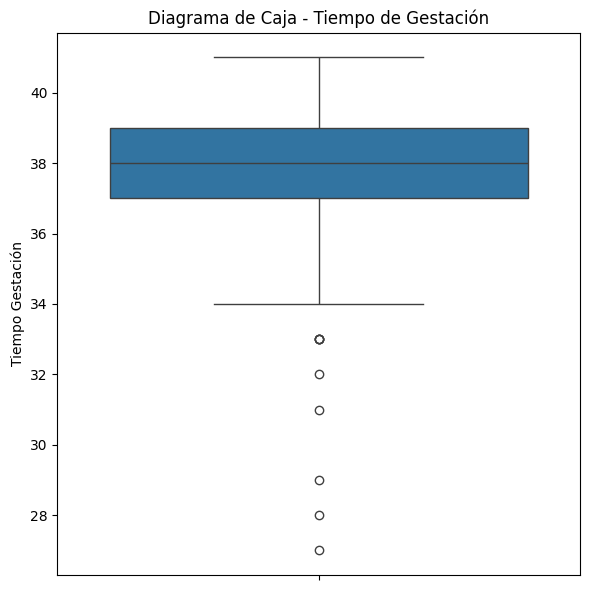

In [ ]:
# Diagrama de caja para Tiempo de Gestación
plt.figure(figsize=(6, 6))
sns.boxplot(y=df_filtrado['Tiempo Gestación'])
plt.title('Diagrama de Caja - Tiempo de Gestación')
plt.tight_layout()
plt.show()

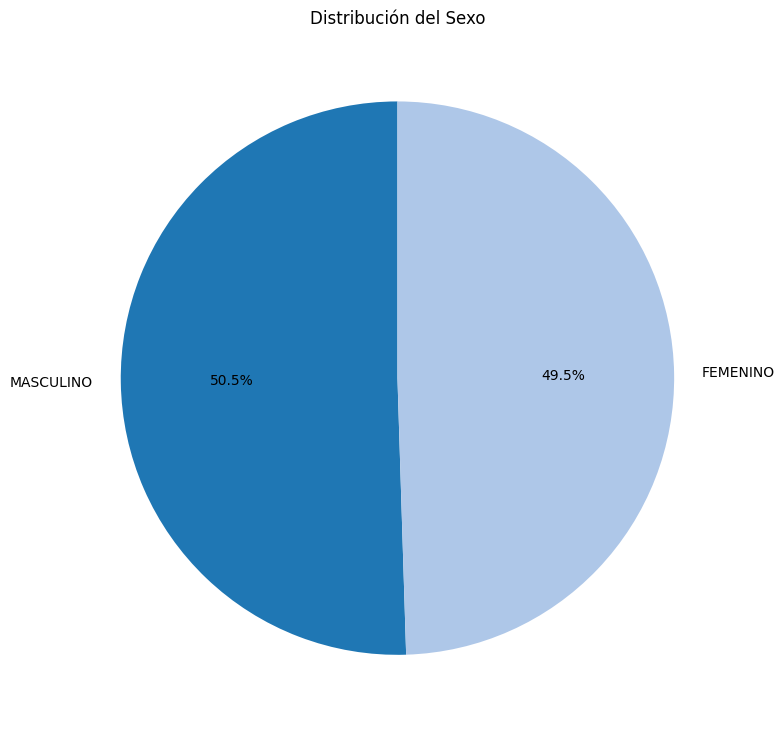

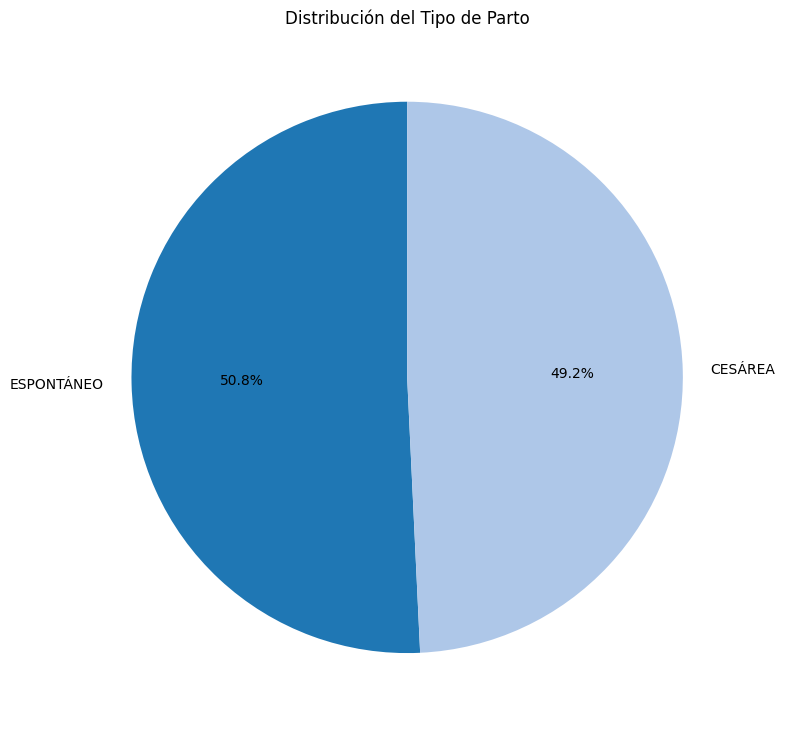

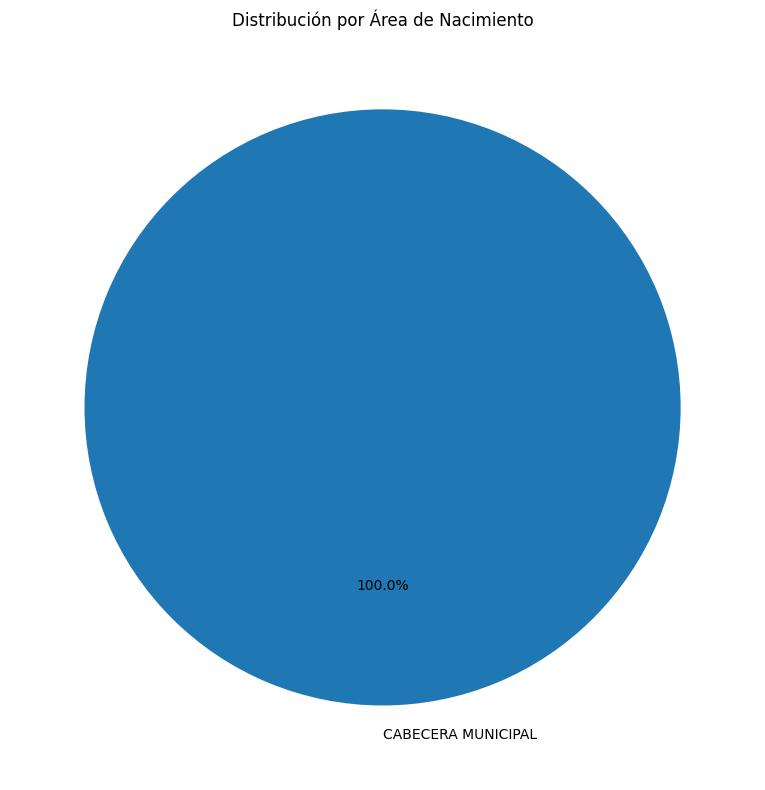

In [ ]:
import matplotlib.pyplot as plt

# Lista de variables categóricas y títulos para los gráficos
categorical_vars = [
    ('Sexo', 'Distribución del Sexo'),
    ('Tipo Parto', 'Distribución del Tipo de Parto'),
    ('Area Nacimiento', 'Distribución por Área de Nacimiento') # Corrected column name and title
]

for var, title in categorical_vars:
    plt.figure(figsize=(8, 8))
    df_filtrado[var].value_counts().plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.tab20.colors
    )
    plt.title(title)
    plt.ylabel('')  # Eliminar la etiqueta del eje y
    plt.tight_layout()
    plt.show()

In [ ]:
# Convertir la columna 'Peso' a numérica, manejando comas como decimales
df_filtrado['Peso'] = df_filtrado['Peso'].str.replace(',', '.', regex=False).astype(float)

# Verificar el tipo de dato después de la conversión
print("Tipo de dato de 'Peso' después de la conversión:")
print(df_filtrado['Peso'].dtype)

# Ahora, reejecutar el código para eliminar atípicos
# Calcular Q1, Q3 e IQR para ambas variables en un solo paso
Q1 = df_filtrado[['Talla', 'Peso']].quantile(0.25)
Q3 = df_filtrado[['Talla', 'Peso']].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para considerar un dato como atípico
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar el DataFrame para eliminar outliers en ambas variables
condicion = (
    (df_filtrado['Talla'] >= limite_inferior['Talla']) & (df_filtrado['Talla'] <= limite_superior['Talla']) &
    (df_filtrado['Peso'] >= limite_inferior['Peso']) & (df_filtrado['Peso'] <= limite_superior['Peso'])
)
df_sinatipicos = df_filtrado[condicion]

# Mostrar la cantidad de datos restantes
print(f"Número de datos restantes después de eliminar outliers: {len(df_sinatipicos)}")

Tipo de dato de 'Peso' después de la conversión:
float64
Número de datos restantes después de eliminar outliers: 372


/tmp/ipython-input-704156938.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Peso'] = df_filtrado['Peso'].str.replace(',', '.', regex=False).astype(float)


In [ ]:
# Calcular Q1, Q3 e IQR para ambas variables en un solo paso
Q1 = df_filtrado[['Talla', 'Peso']].quantile(0.25)
Q3 = df_filtrado[['Talla', 'Peso']].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para considerar un dato como atípico
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar el DataFrame para eliminar outliers en ambas variables
condicion = (
    (df_filtrado['Talla'] >= limite_inferior['Talla']) & (df_filtrado['Talla'] <= limite_superior['Talla']) &
    (df_filtrado['Peso'] >= limite_inferior['Peso']) & (df_filtrado['Peso'] <= limite_superior['Peso'])
)
df_sinatipicos = df_filtrado[condicion]

# Mostrar la cantidad de datos restantes
print(f"Número de datos restantes después de eliminar outliers: {len(df_sinatipicos)}")

Número de datos restantes después de eliminar outliers: 372


/tmp/ipython-input-447505994.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


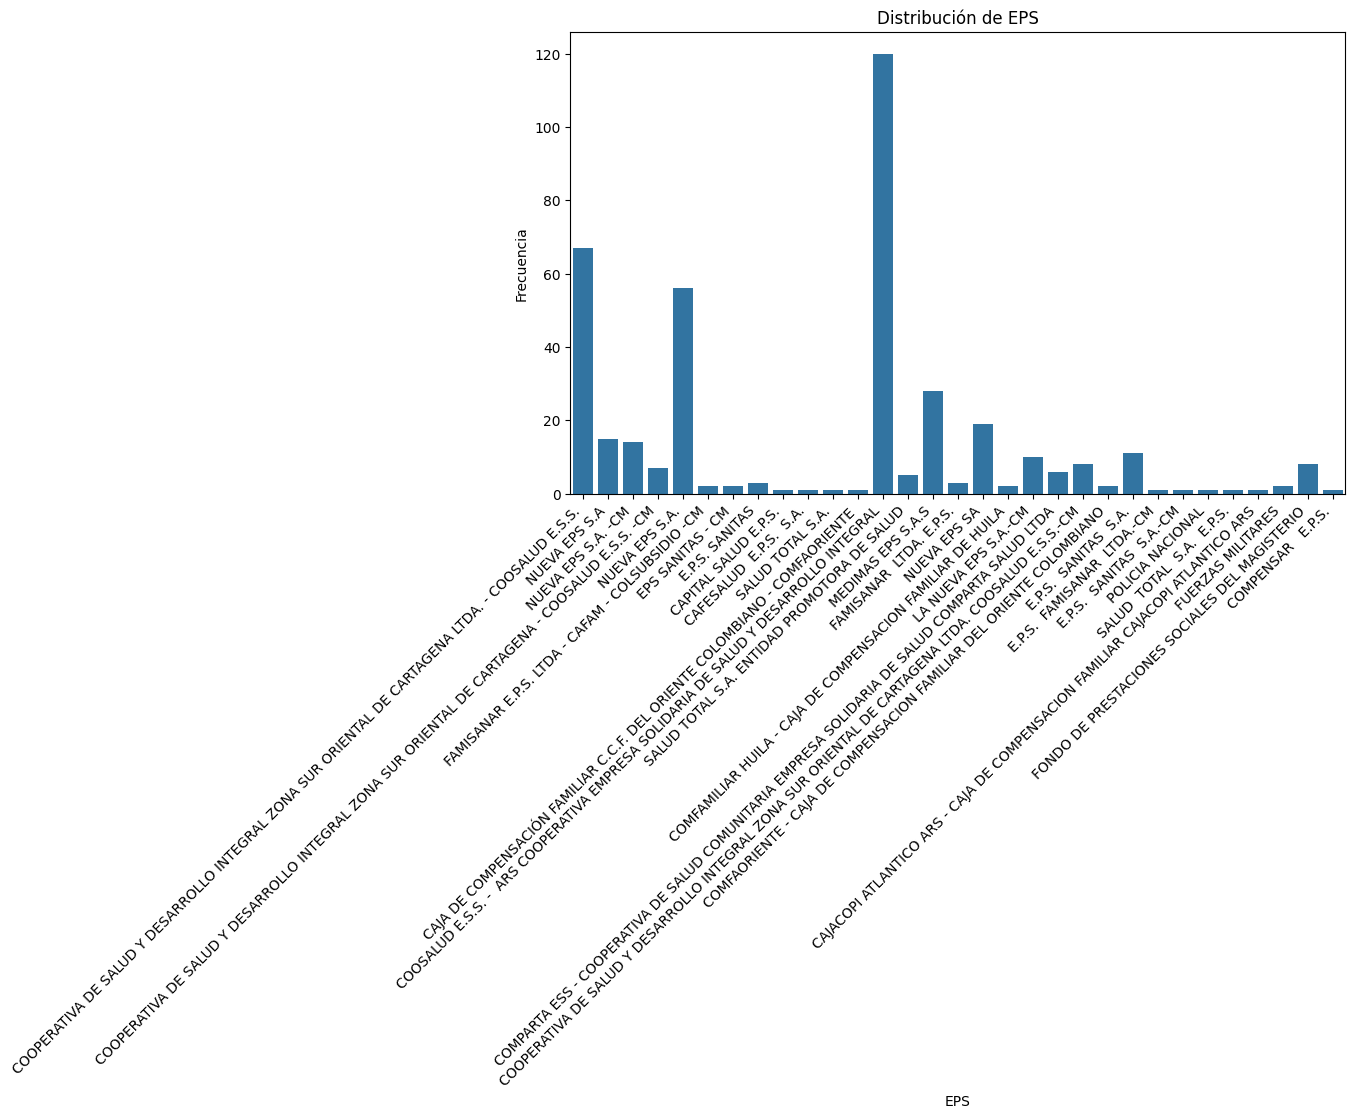

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df_filtrado, x='EPS')
plt.title('Distribución de EPS')
plt.xlabel('EPS')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')  # Mejora la legibilidad de las etiquetas
plt.tight_layout()
plt.show()

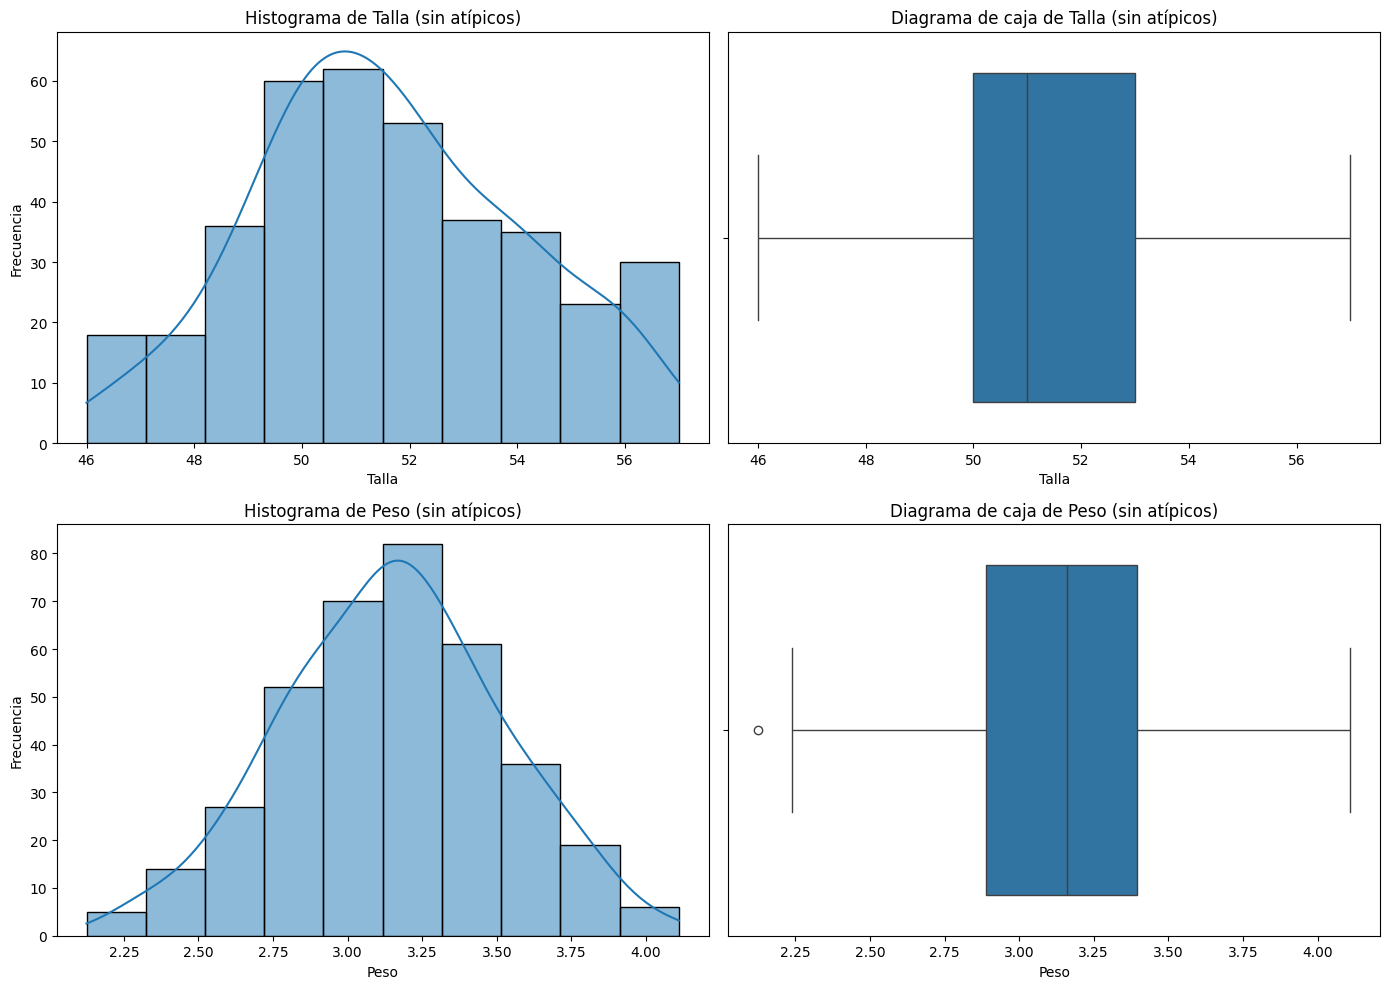

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histograma y boxplot para Talla
sns.histplot(df_sinatipicos['Talla'], bins=10, edgecolor='black', kde=True, ax=axes[0, 0])
axes[0, 0].set_xlabel('Talla')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].set_title('Histograma de Talla (sin atípicos)')

sns.boxplot(x=df_sinatipicos['Talla'], ax=axes[0, 1])
axes[0, 1].set_xlabel('Talla')
axes[0, 1].set_title('Diagrama de caja de Talla (sin atípicos)')

# Histograma y boxplot para Peso
sns.histplot(df_sinatipicos['Peso'], bins=10, edgecolor='black', kde=True, ax=axes[1, 0])
axes[1, 0].set_xlabel('Peso')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].set_title('Histograma de Peso (sin atípicos)')

sns.boxplot(x=df_sinatipicos['Peso'], ax=axes[1, 1])
axes[1, 1].set_xlabel('Peso')
axes[1, 1].set_title('Diagrama de caja de Peso (sin atípicos)')

plt.tight_layout()
plt.show()

Resultados de los tests de normalidad (valores p):

Variable: Talla
  Shapiro-Wilk p = 0.0000
  Kolmogorov-Smirnov p = 0.0001
  Anderson-Darling Estadístico: 3.4205, Crítico (5%): 0.7790
  Jarque-Bera p = 0.0893
  → NO es distribución normal (según mayoría de tests)

Variable: Peso
  Shapiro-Wilk p = 0.8122
  Kolmogorov-Smirnov p = 0.9817
  Anderson-Darling Estadístico: 0.1694, Crítico (5%): 0.7790
  Jarque-Bera p = 0.6136
  → Distribución normal (según mayoría de tests)



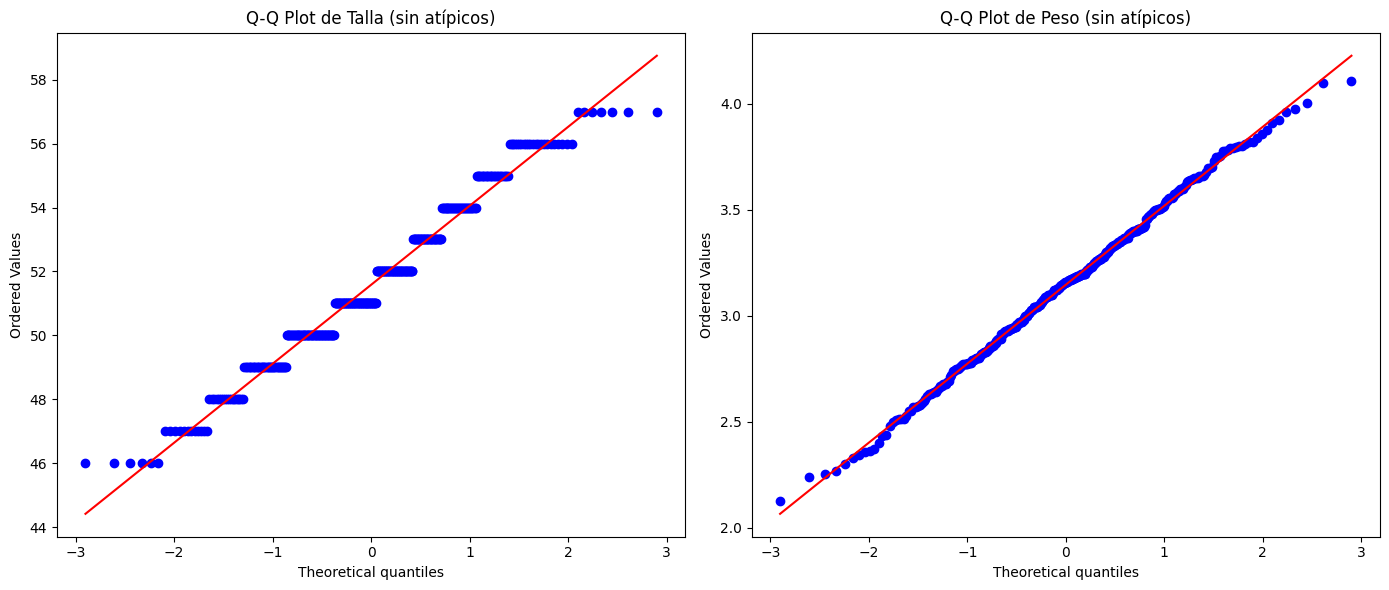

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kstest, anderson, jarque_bera, probplot

# Lista de variables a evaluar
columnas_fisicas = ['Talla', 'Peso']

# Diccionario para almacenar resultados
resultados_normalidad = {}

# Evaluar cada variable en df_sinatipicos
for col in columnas_fisicas:
    if col in df_sinatipicos.columns:
        datos = df_sinatipicos[col].dropna() # Usar df_sinatipicos
        # Asegurarse de que los datos son numéricos
        datos = pd.to_numeric(datos, errors='coerce').dropna()

        if len(datos) < 5000: # Shapiro-Wilk es más adecuado para muestras pequeñas
            # Shapiro-Wilk
            stat_sw, p_sw = shapiro(datos)
        else:
            stat_sw, p_sw = np.nan, np.nan # No aplicar si la muestra es muy grande

        # Kolmogorov-Smirnov
        # Kstest requires distribution parameters for 'norm' argument
        media, desv = np.mean(datos), np.std(datos)
        stat_ks, p_ks = kstest(datos, "norm", args=(media, desv))

        # Anderson-Darling
        resultado_ad = anderson(datos)
        stat_ad = resultado_ad.statistic
        # Compare with critical values for 5% significance level
        crit_ad = resultado_ad.critical_values[2] # 5% significance level
        ad_normal = stat_ad < crit_ad

        # Jarque-Bera (requires at least 20 observations, typically used for larger samples)
        if len(datos) >= 20:
            stat_jb, p_jb = jarque_bera(datos)
        else:
            stat_jb, p_jb = np.nan, np.nan

        # Guardar resultados
        resultados_normalidad[col] = {
            'Shapiro-Wilk_p': p_sw,
            'Kolmogorov-Smirnov_p': p_ks,
            'Anderson-Darling_stat': stat_ad,
            'Anderson-Darling_crit_5%': crit_ad,
            'Anderson-Darling_normal': ad_normal,
            'Jarque-Bera_p': p_jb,
            'Es_Normal_SW': p_sw > 0.05 if not np.isnan(p_sw) else 'N/A',
            'Es_Normal_KS': p_ks > 0.05,
            'Es_Normal_AD': ad_normal,
            'Es_Normal_JB': p_jb > 0.05 if not np.isnan(p_jb) else 'N/A'
        }

# Mostrar resultados en tabla
print("Resultados de los tests de normalidad (valores p):\n")
for var, res in resultados_normalidad.items():
    print(f"Variable: {var}")
    print(f"  Shapiro-Wilk p = {res['Shapiro-Wilk_p']:.4f}")
    print(f"  Kolmogorov-Smirnov p = {res['Kolmogorov-Smirnov_p']:.4f}")
    print(f"  Anderson-Darling Estadístico: {res['Anderson-Darling_stat']:.4f}, Crítico (5%): {res['Anderson-Darling_crit_5%']:.4f}")
    print(f"  Jarque-Bera p = {res['Jarque-Bera_p']:.4f}")

    # Determine normality based on p-values (alpha = 0.05)
    normal_counts = 0
    if not np.isnan(res['Shapiro-Wilk_p']) and res['Shapiro-Wilk_p'] > 0.05: normal_counts += 1
    if res['Kolmogorov-Smirnov_p'] > 0.05: normal_counts += 1
    if res['Anderson-Darling_normal']: normal_counts += 1
    if not np.isnan(res['Jarque-Bera_p']) and res['Jarque-Bera_p'] > 0.05: normal_counts += 1

    if normal_counts >= 3: # Criteria for 'majority'
        print("  → Distribución normal (según mayoría de tests)\n")
    else:
        print("  → NO es distribución normal (según mayoría de tests)\n")

# Gráficos QQ para cada variable
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for i, col in enumerate(columnas_fisicas):
    if col in df_sinatipicos.columns:
        datos = df_sinatipicos[col].dropna()
        datos = pd.to_numeric(datos, errors='coerce').dropna()
        if not datos.empty:
            probplot(datos, dist="norm", plot=axes[i])
            axes[i].set_title(f'Q-Q Plot de {col} (sin atípicos)')
        else:
            axes[i].set_title(f'No hay datos para {col}')
            axes[i].text(0.5, 0.5, 'No data', horizontalalignment='center', verticalalignment='center', transform=axes[i].transAxes)

plt.tight_layout()
plt.show()

In [ ]:
#!/usr/bin/env python3
"""
Análisis Estadístico de Datos de Nacimientos
Análisis exploratorio completo con medidas de tendencia central y dispersión
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings

warnings.filterwarnings('ignore')
sns.set_theme(style='whitegrid')
plt.rcParams.update({'figure.figsize': (10, 6), 'font.size': 10})

class AnalizadorNacimientos:
    def __init__(self, archivo_csv):
        self.archivo = archivo_csv
        self.df_original = None
        self.df_filtrado = None
        self.df_sinatipicos = None
        self.variables_numericas = ['Peso', 'Talla', 'Tiempo Gestación'] # Corrected column name
        # Corrected categorical variables based on current dataset. Multiplicidad_Embarazo not found.
        self.variables_categoricas = ['Sexo', 'Tipo Parto', 'Area Nacimiento']

    def cargar_datos(self):
        print("="*60)
        print("CARGANDO Y EXPLORANDO DATOS")
        print("="*60)
        try:
            # Using the correct CSV file name from previous interactions
            self.df_original = pd.read_csv(self.archivo)
            print(f"✓ Archivo cargado exitosamente: {self.archivo}")
            print(f"✓ Dimensiones del dataset: {self.df_original.shape}")
            print("\n--- INFORMACIÓN DEL DATASET ---")
            self.df_original.info()
            print("\n--- PRIMERAS 5 FILAS ---")
            print(self.df_original.head())
            print("\n--- RESUMEN ESTADÍSTICO ---")
            print(self.df_original.describe(include='all'))
        except FileNotFoundError:
            print(f"❌ Error: No se encontró el archivo {self.archivo}")
            return False
        except Exception as e:
            print(f"❌ Error al cargar el archivo: {e}")
            return False
        return True

    def limpiar_datos(self):
        print("\n" + "="*60)
        print("LIMPIEZA DE DATOS")
        print("="*60)

        # 1. Manejo de valores faltantes
        print("\n--- VALORES FALTANTES (ORIGINAL) ---")
        faltantes_original = self.df_original.isnull().sum()
        print(faltantes_original[faltantes_original > 0])
        if faltantes_original.sum() > 0:
            print("\nVisualizando datos faltantes (heatmap original):")
            plt.figure(figsize=(10, 3))
            sns.heatmap(self.df_original.isnull(), cbar=False, cmap="viridis")
            plt.title("Mapa de Datos Faltantes (Original)")
            plt.show()
            print("Eliminando filas con datos faltantes...")
            self.df_filtrado = self.df_original.dropna().copy() # Usar .copy() para evitar SettingWithCopyWarning
            print(f"Número de filas después de eliminar faltantes: {self.df_filtrado.shape[0]}")
            print("Verificando datos faltantes después de la eliminación:")
            faltantes_despues = self.df_filtrado.isnull().sum()
            print(faltantes_despues[faltantes_despues > 0])
            if faltantes_despues.sum() == 0:
                print("✓ No hay valores faltantes después de la limpieza.")
            else:
                print("❌ Aún quedan valores faltantes.")
            print("Visualizando datos faltantes (heatmap después de limpieza):")
            plt.figure(figsize=(10, 3))
            sns.heatmap(self.df_filtrado.isnull(), cbar=False, cmap="viridis")
            plt.title("Mapa de Datos Faltantes (Después de Limpieza)")
            plt.show()
        else:
            print("✓ No hay valores faltantes en el dataset original.")
            self.df_filtrado = self.df_original.copy() # Si no hay faltantes, df_filtrado es una copia del original

        # 2. Conversión de tipos de datos (especialmente 'Peso')
        print("\n--- CONVERSIÓN DE TIPOS DE DATOS ---")
        if 'Peso' in self.df_filtrado.columns and self.df_filtrado['Peso'].dtype == 'object':
            print("Convirtiendo la columna 'Peso' a numérica...")
            # Reemplazar comas por puntos y convertir a float
            self.df_filtrado['Peso'] = self.df_filtrado['Peso'].str.replace(',', '.', regex=False).astype(float)
            print(f"✓ 'Peso' convertido a tipo: {self.df_filtrado['Peso'].dtype}")
        else:
            print("✓ La columna 'Peso' ya es numérica o no existe.")

        # 3. Detección y eliminación de atípicos (outliers) para 'Talla' y 'Peso'
        print("\n--- DETECCIÓN Y ELIMINACIÓN DE ATÍPICOS ---")
        if 'Talla' in self.df_filtrado.columns and 'Peso' in self.df_filtrado.columns:
            Q1 = self.df_filtrado[['Talla', 'Peso']].quantile(0.25)
            Q3 = self.df_filtrado[['Talla', 'Peso']].quantile(0.75)
            IQR = Q3 - Q1

            limite_inferior = Q1 - 1.5 * IQR
            limite_superior = Q3 + 1.5 * IQR

            condicion_outliers = (
                (self.df_filtrado['Talla'] >= limite_inferior['Talla']) & (self.df_filtrado['Talla'] <= limite_superior['Talla']) &
                (self.df_filtrado['Peso'] >= limite_inferior['Peso']) & (self.df_filtrado['Peso'] <= limite_superior['Peso'])
            )
            self.df_sinatipicos = self.df_filtrado[condicion_outliers].copy() # Usar .copy() para evitar SettingWithCopyWarning

            num_outliers = self.df_filtrado.shape[0] - self.df_sinatipicos.shape[0]
            print(f"Se encontraron y eliminaron {num_outliers} atípicos en 'Talla' y 'Peso'.")
            print(f"Número de filas después de eliminar atípicos: {self.df_sinatipicos.shape[0]}")

            print("Visualizando distribuciones después de eliminar atípicos:")
            fig, axes = plt.subplots(2, 2, figsize=(14, 10))

            sns.histplot(self.df_sinatipicos['Talla'], bins=10, edgecolor='black', kde=True, ax=axes[0, 0])
            axes[0, 0].set_title('Histograma de Talla (sin atípicos)')
            sns.boxplot(x=self.df_sinatipicos['Talla'], ax=axes[0, 1])
            axes[0, 1].set_title('Diagrama de Caja de Talla (sin atípicos)')

            sns.histplot(self.df_sinatipicos['Peso'], bins=10, edgecolor='black', kde=True, ax=axes[1, 0])
            axes[1, 0].set_title('Histograma de Peso (sin atípicos)')
            sns.boxplot(x=self.df_sinatipicos['Peso'], ax=axes[1, 1])
            axes[1, 1].set_title('Diagrama de Caja de Peso (sin atípicos)')

            plt.tight_layout()
            plt.show()
        else:
            print("❌ Las columnas 'Talla' o 'Peso' no están presentes para detectar atípicos.")
            self.df_sinatipicos = self.df_filtrado.copy()

        return True
